In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading the Given Dataset

In [2]:
data = pd.read_csv('PAYU.csv')

In [3]:
data

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,Requested Action,Status,Transaction amount,Transaction fee,Payment Type
0,9511450,9410106299,14/07/21 10:03,16/07/21,capture,SUCCESS,300.0,21.24,NB
1,9639200,9406287755,13/07/21 16:46,14/07/21,capture,SUCCESS,2200.0,22.42,NB
2,9682368,8070594039,11/07/21 5:40,13/07/21,capture,SUCCESS,5450.0,22.42,NB
3,9682368,8070598614,11/07/21 13:36,13/07/21,capture,SUCCESS,5450.0,22.42,NB
4,9682368,8070601263,11/07/21 17:54,13/07/21,capture,SUCCESS,2725.0,22.42,NB
...,...,...,...,...,...,...,...,...,...
35035,14794168,8070658263,11/07/21 17:10,13/07/21,capture,SUCCESS,1700.0,0.00,DC
35036,14811686,8070661171,11/07/21 20:36,\N,capture,SUCCESS,4050.0,0.00,DC
35037,14823548,8070652765,11/07/21 10:38,13/07/21,capture,SUCCESS,2000.0,0.00,DC
35038,14823548,8070652926,11/07/21 10:46,13/07/21,capture,SUCCESS,20000.0,0.00,DC


# Checking For NULL Values

In [4]:
data.isnull()

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,Requested Action,Status,Transaction amount,Transaction fee,Payment Type
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
35035,False,False,False,False,False,False,False,False,False
35036,False,False,False,False,False,False,False,False,False
35037,False,False,False,False,False,False,False,False,False
35038,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

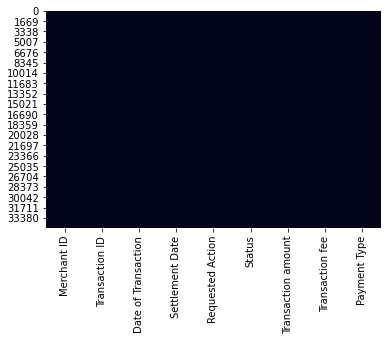

In [5]:
## Heatmap for Null Values
sns.heatmap(data.isnull(),cbar=False)

## No NULL Values Present

# Question 1 : For 14 July 2021 find the required details 
# 1(a) Most frequently used payment type

In [6]:
A = data[data['Date of Transaction'].str.contains("14/07/21")][['Date of Transaction','Payment Type','Settlement Date']]
A

,Date of Transaction,Payment Type,Settlement Date
0,14/07/21 10:03,NB,16/07/21
9,14/07/21 21:19,NB,15/07/21
14,14/07/21 14:31,NB,16/07/21
18,14/07/21 22:51,NB,15/07/21
19,14/07/21 0:10,NB,\N
...,...,...,...
34989,14/07/21 23:30,CC,15/07/21
34998,14/07/21 10:35,DC,\N
35000,14/07/21 21:44,DC,15/07/21
35012,14/07/21 21:04,Wallet,15/07/21


In [7]:
A['Payment Type'].value_counts()

DC        2953
UPI       2133
NB        1817
CC         731
Wallet     383
EMI          6
Name: Payment Type, dtype: int64

C:\Users\hrock\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Payment Type', ylabel='count'>

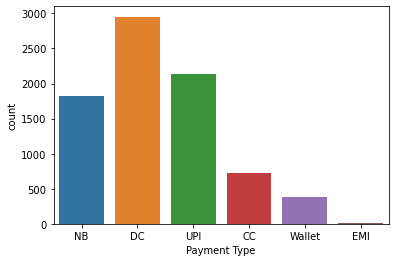

In [8]:
sns.countplot('Payment Type',data= A)

### 1(A) Therefore We can Conclude that Most frequently used payment type is DC

# 1(B) Merchant ID with highest transaction value# 

In [9]:
B = data[data['Date of Transaction'].str.contains("14/07/21")][['Transaction amount','Merchant ID']]
B.reset_index()

,index,Transaction amount,Merchant ID
0,0,300.00,9511450
1,9,5450.00,9682368
2,14,300.00,9511450
3,18,5700.00,9682368
4,19,10000.00,9709540
...,...,...,...
8018,34989,13240.00,14773512
8019,34998,3482.18,14811686
8020,35000,7000.00,14823548
8021,35012,7160.00,14712218


### To get the maximum value of table B

In [10]:
max_value = B.max()
max_value

Transaction amount      177400.0
Merchant ID           14875562.0
dtype: float64

#### To get the index of the given Transaction 

In [11]:
np.where(B["Transaction amount"]==177400.0)

(array([2886], dtype=int64),)

#### To get the data of the given index

In [12]:
rowData = B.iloc[2886]
rowData

Transaction amount      177400.0
Merchant ID           11508728.0
Name: 14916, dtype: float64

### 1(B) Therefore from above we can conlcude that Merchant ID with highest transaction value : 11508728.0

# 1(c) : % transactions which were settled by 15th July# 

In [13]:
C = A[A['Settlement Date'].str.contains("15/07/21")][['Date of Transaction','Settlement Date']]
C

,Date of Transaction,Settlement Date
9,14/07/21 21:19,15/07/21
18,14/07/21 22:51,15/07/21
58,14/07/21 10:01,15/07/21
84,14/07/21 9:02,15/07/21
85,14/07/21 9:41,15/07/21
...,...,...
34988,14/07/21 11:27,15/07/21
34989,14/07/21 23:30,15/07/21
35000,14/07/21 21:44,15/07/21
35012,14/07/21 21:04,15/07/21


### Percentage calculation 

In [14]:
percentage = (4534/8024)*100
percentage

56.50548354935194

### 1.(C) Therefore from above we can conlcude that % transactions which were settled by 15th July is 56.50548354935194

# Question 2 : Which payment type has the highest transaction fee %

In [15]:
data

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,Requested Action,Status,Transaction amount,Transaction fee,Payment Type
0,9511450,9410106299,14/07/21 10:03,16/07/21,capture,SUCCESS,300.0,21.24,NB
1,9639200,9406287755,13/07/21 16:46,14/07/21,capture,SUCCESS,2200.0,22.42,NB
2,9682368,8070594039,11/07/21 5:40,13/07/21,capture,SUCCESS,5450.0,22.42,NB
3,9682368,8070598614,11/07/21 13:36,13/07/21,capture,SUCCESS,5450.0,22.42,NB
4,9682368,8070601263,11/07/21 17:54,13/07/21,capture,SUCCESS,2725.0,22.42,NB
...,...,...,...,...,...,...,...,...,...
35035,14794168,8070658263,11/07/21 17:10,13/07/21,capture,SUCCESS,1700.0,0.00,DC
35036,14811686,8070661171,11/07/21 20:36,\N,capture,SUCCESS,4050.0,0.00,DC
35037,14823548,8070652765,11/07/21 10:38,13/07/21,capture,SUCCESS,2000.0,0.00,DC
35038,14823548,8070652926,11/07/21 10:46,13/07/21,capture,SUCCESS,20000.0,0.00,DC


### Transaction Fee % for DC

In [16]:
DC= data[data['Payment Type'].str.contains("DC")]
DC

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,Requested Action,Status,Transaction amount,Transaction fee,Payment Type
120,9511450,9397715359,12/07/21 12:08,14/07/21,capture,SUCCESS,300.0,0.0,DC
121,9511450,9401583093,12/07/21 21:29,14/07/21,capture,SUCCESS,300.0,0.0,DC
122,9511450,9404549861,13/07/21 12:26,15/07/21,capture,SUCCESS,500.0,0.0,DC
123,9511450,9405971427,13/07/21 15:49,15/07/21,capture,SUCCESS,300.0,0.0,DC
124,9511450,9407212499,13/07/21 19:04,15/07/21,capture,SUCCESS,300.0,0.0,DC
...,...,...,...,...,...,...,...,...,...
35035,14794168,8070658263,11/07/21 17:10,13/07/21,capture,SUCCESS,1700.0,0.0,DC
35036,14811686,8070661171,11/07/21 20:36,\N,capture,SUCCESS,4050.0,0.0,DC
35037,14823548,8070652765,11/07/21 10:38,13/07/21,capture,SUCCESS,2000.0,0.0,DC
35038,14823548,8070652926,11/07/21 10:46,13/07/21,capture,SUCCESS,20000.0,0.0,DC


In [17]:
(DC['Transaction fee'].sum()/DC['Transaction amount'].sum())*100

0.8554316032241163

### Transaction Fee % for  DC = 0.85 %

## Transaction Fee % for UPI

In [18]:
UPI = data[data['Payment Type'].str.contains("UPI")]
UPI

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,Requested Action,Status,Transaction amount,Transaction fee,Payment Type
140,9511450,8070593685,11/07/21 0:26,13/07/21,capture,SUCCESS,300.0,0.0,UPI
141,9511450,8070594300,11/07/21 7:48,13/07/21,capture,SUCCESS,300.0,0.0,UPI
142,9511450,8070594766,11/07/21 8:56,13/07/21,capture,SUCCESS,300.0,0.0,UPI
143,9511450,8070595810,11/07/21 10:30,13/07/21,capture,SUCCESS,500.0,0.0,UPI
144,9511450,8070595845,11/07/21 10:32,13/07/21,capture,SUCCESS,300.0,0.0,UPI
...,...,...,...,...,...,...,...,...,...
35020,14674536,9405187433,13/07/21 13:55,14/07/21,capture,SUCCESS,1000.0,0.0,UPI
35021,14773512,9403350843,13/07/21 9:39,14/07/21,capture,SUCCESS,5140.0,0.0,UPI
35022,14773512,9403498697,13/07/21 10:03,14/07/21,capture,SUCCESS,5680.0,0.0,UPI
35023,14773512,9419035393,15/07/21 15:43,16/07/21,capture,SUCCESS,5680.0,0.0,UPI


In [19]:
(UPI['Transaction fee'].sum()/UPI['Transaction amount'].sum())*100

0.011534823350971786

### Transaction Fee % for UPI  = 0.0115 %

## Transaction Fee % for NB

In [20]:
NB = data[data['Payment Type'].str.contains("NB")]
NB

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,Requested Action,Status,Transaction amount,Transaction fee,Payment Type
0,9511450,9410106299,14/07/21 10:03,16/07/21,capture,SUCCESS,300.0,21.24,NB
1,9639200,9406287755,13/07/21 16:46,14/07/21,capture,SUCCESS,2200.0,22.42,NB
2,9682368,8070594039,11/07/21 5:40,13/07/21,capture,SUCCESS,5450.0,22.42,NB
3,9682368,8070598614,11/07/21 13:36,13/07/21,capture,SUCCESS,5450.0,22.42,NB
4,9682368,8070601263,11/07/21 17:54,13/07/21,capture,SUCCESS,2725.0,22.42,NB
...,...,...,...,...,...,...,...,...,...
34532,14767352,9416878943,15/07/21 10:37,\N,capture,SUCCESS,11500.0,27.14,NB
34533,14773512,9411084517,14/07/21 12:21,16/07/21,capture,SUCCESS,9120.0,14.16,NB
34745,14715270,9409861199,14/07/21 9:22,16/07/21,capture,SUCCESS,1000.0,24.17,NB
34746,14715270,9409937067,14/07/21 9:33,16/07/21,capture,SUCCESS,1000.0,24.17,NB


In [21]:
(NB['Transaction fee'].sum()/NB['Transaction amount'].sum())*100

0.14738953094731444

### Transaction Fee % for NB  = 0.1473 %

## Transaction Fee % for CC

In [22]:
CC = data[data['Payment Type'].str.contains("CC")]
CC

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,Requested Action,Status,Transaction amount,Transaction fee,Payment Type
132,9511450,9418157843,15/07/21 13:16,\N,capture,SUCCESS,300.0,4.13,CC
134,9511450,9420250237,15/07/21 18:51,\N,capture,SUCCESS,1000.0,13.76,CC
139,9709540,9396094409,12/07/21 7:48,14/07/21,capture,SUCCESS,180100.0,2477.58,CC
381,9697672,9409054203,14/07/21 0:32,15/07/21,capture,SUCCESS,589.0,13.51,CC
382,9697672,9415197415,14/07/21 22:56,15/07/21,capture,SUCCESS,589.0,13.51,CC
...,...,...,...,...,...,...,...,...,...
35003,14866852,8070657981,11/07/21 16:47,13/07/21,capture,SUCCESS,516.0,12.41,CC
35006,14804276,9405980503,13/07/21 15:57,14/07/21,capture,SUCCESS,16520.0,378.87,CC
35007,14804276,9405989559,13/07/21 15:59,14/07/21,capture,SUCCESS,24426.0,560.19,CC
35008,14804276,9405998655,13/07/21 16:00,14/07/21,capture,SUCCESS,17346.0,397.81,CC


In [23]:
(CC['Transaction fee'].sum()/CC['Transaction amount'].sum())*100

1.7169398608399555

### Transaction Fee % for CC  = 1.7169 %

## Transaction Fee % for  Wallet

In [24]:
Wallet = data[data['Payment Type'].str.contains("Wallet")]
Wallet

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,Requested Action,Status,Transaction amount,Transaction fee,Payment Type
21,9697672,8070598855,11/07/21 13:57,13/07/21,capture,SUCCESS,588.0,14.21,Wallet
455,9511450,8070599586,11/07/21 15:06,13/07/21,capture,SUCCESS,300.0,7.25,Wallet
456,9511450,8070603556,11/07/21 21:15,13/07/21,capture,SUCCESS,300.0,7.25,Wallet
457,9511450,9401941965,12/07/21 22:28,14/07/21,capture,SUCCESS,300.0,7.26,Wallet
458,9511450,9405958791,13/07/21 15:53,15/07/21,capture,SUCCESS,300.0,7.26,Wallet
...,...,...,...,...,...,...,...,...,...
35014,14767060,9418248205,15/07/21 13:40,16/07/21,capture,SUCCESS,23400.0,450.29,Wallet
35015,14773512,9407278293,13/07/21 18:45,14/07/21,capture,SUCCESS,62300.0,1390.36,Wallet
35016,14811686,9407369609,13/07/21 19:28,\N,capture,SUCCESS,8100.0,0.00,Wallet
35017,14823548,9414287371,14/07/21 20:26,15/07/21,capture,SUCCESS,1000.0,21.70,Wallet


In [25]:
(Wallet['Transaction fee'].sum()/Wallet['Transaction amount'].sum())*100

1.798968249125733

### Transaction Fee % for Wallet  = 1.7989 %

## Transaction Fee %  for EMI

In [26]:
EMI = data[data['Payment Type'].str.contains("EMI")]
EMI

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,Requested Action,Status,Transaction amount,Transaction fee,Payment Type
682,9639200,9405079941,13/07/21 13:39,14/07/21,capture,SUCCESS,20200.0,339.31,EMI
4366,10360852,9415884467,15/07/21 7:22,16/07/21,capture,SUCCESS,18750.0,269.31,EMI
4367,10360852,9415898237,15/07/21 7:26,16/07/21,capture,SUCCESS,25500.0,366.27,EMI
4380,10424416,8070594872,11/07/21 9:08,13/07/21,capture,SUCCESS,37000.0,437.34,EMI
5179,10590420,9404133003,13/07/21 11:32,14/07/21,capture,SUCCESS,10893.0,143.25,EMI
10061,10826458,9417690239,15/07/21 12:23,\N,capture,SUCCESS,23100.0,331.79,EMI
11602,11043498,9396548755,12/07/21 9:29,13/07/21,capture,SUCCESS,29500.0,477.55,EMI
13830,11339348,9421835719,15/07/21 22:50,16/07/21,capture,SUCCESS,10000.0,143.63,EMI
14559,11423538,9397128879,12/07/21 10:55,14/07/21,capture,SUCCESS,34200.0,449.76,EMI
14579,11423868,8070602995,11/07/21 20:24,13/07/21,capture,SUCCESS,19700.0,259.07,EMI


In [27]:
(EMI['Transaction fee'].sum()/EMI['Transaction amount'].sum())*100

0.8204377130651213

### Transaction Fee % for EMI   = 0.8204 %

## 2.Therefore from Above calculation Transaction Fee % for Wallet is highest = 1.7989 % 


# Question 3 :  What percentage of transactions were settled within 1-day

In [28]:
D = data[data['Settlement Date'].str.contains("07/21")]
D

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,Requested Action,Status,Transaction amount,Transaction fee,Payment Type
0,9511450,9410106299,14/07/21 10:03,16/07/21,capture,SUCCESS,300.0,21.24,NB
1,9639200,9406287755,13/07/21 16:46,14/07/21,capture,SUCCESS,2200.0,22.42,NB
2,9682368,8070594039,11/07/21 5:40,13/07/21,capture,SUCCESS,5450.0,22.42,NB
3,9682368,8070598614,11/07/21 13:36,13/07/21,capture,SUCCESS,5450.0,22.42,NB
4,9682368,8070601263,11/07/21 17:54,13/07/21,capture,SUCCESS,2725.0,22.42,NB
...,...,...,...,...,...,...,...,...,...
35034,14794168,8070655095,11/07/21 12:54,13/07/21,capture,SUCCESS,3600.0,0.00,DC
35035,14794168,8070658263,11/07/21 17:10,13/07/21,capture,SUCCESS,1700.0,0.00,DC
35037,14823548,8070652765,11/07/21 10:38,13/07/21,capture,SUCCESS,2000.0,0.00,DC
35038,14823548,8070652926,11/07/21 10:46,13/07/21,capture,SUCCESS,20000.0,0.00,DC


### All Settlement Dates 

In [29]:
D['Settlement Date'].value_counts()

15/07/21    7923
16/07/21    7841
13/07/21    7115
14/07/21    7102
Name: Settlement Date, dtype: int64

C:\Users\hrock\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Settlement Date', ylabel='count'>

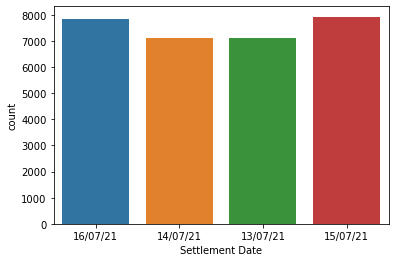

In [30]:
sns.countplot('Settlement Date', data=D)

### Transactions settled  on 15/07/21

In [31]:
E=D[(D['Settlement Date'].str.contains('15/07/21'))&(D['Date of Transaction'].str.contains('14/07/21|15/07/21'))]
E

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,Requested Action,Status,Transaction amount,Transaction fee,Payment Type
9,9682368,9414639437,14/07/21 21:19,15/07/21,capture,SUCCESS,5450.0,22.42,NB
18,9682368,9415171189,14/07/21 22:51,15/07/21,capture,SUCCESS,5700.0,22.42,NB
58,9682368,9410099219,14/07/21 10:01,15/07/21,capture,SUCCESS,16350.0,22.42,NB
84,9682368,9409759295,14/07/21 9:02,15/07/21,capture,SUCCESS,5450.0,22.42,NB
85,9682368,9409975159,14/07/21 9:41,15/07/21,capture,SUCCESS,5450.0,22.42,NB
...,...,...,...,...,...,...,...,...,...
34988,14773512,9410708997,14/07/21 11:27,15/07/21,capture,SUCCESS,21100.0,277.48,CC
34989,14773512,9415339781,14/07/21 23:30,15/07/21,capture,SUCCESS,13240.0,174.12,CC
35000,14823548,9414789127,14/07/21 21:44,15/07/21,capture,SUCCESS,7000.0,83.59,DC
35012,14712218,9414548725,14/07/21 21:04,15/07/21,capture,SUCCESS,7160.0,173.06,Wallet


### Transactions started on 16/07/21

In [32]:
F = D[(D['Settlement Date'].str.contains('16/07/21'))&(D['Date of Transaction'].str.contains('15/07/21|16/07/21'))]
F

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,Requested Action,Status,Transaction amount,Transaction fee,Payment Type
10,9682368,9419549907,15/07/21 17:02,16/07/21,capture,SUCCESS,5700.0,22.42,NB
88,9682368,9421470667,15/07/21 21:49,16/07/21,capture,SUCCESS,5450.0,22.42,NB
89,9682368,9421492767,15/07/21 21:53,16/07/21,capture,SUCCESS,5450.0,22.42,NB
90,9682368,9421514651,15/07/21 21:49,16/07/21,capture,SUCCESS,16350.0,22.42,NB
91,9682368,9422044109,15/07/21 23:41,16/07/21,capture,SUCCESS,5450.0,22.42,NB
...,...,...,...,...,...,...,...,...,...
35010,14674536,9418093103,15/07/21 13:19,16/07/21,capture,SUCCESS,3000.0,72.51,Wallet
35011,14674536,9418178391,15/07/21 13:30,16/07/21,capture,SUCCESS,3000.0,72.51,Wallet
35013,14712218,9420881321,15/07/21 20:19,16/07/21,capture,SUCCESS,3935.0,95.11,Wallet
35014,14767060,9418248205,15/07/21 13:40,16/07/21,capture,SUCCESS,23400.0,450.29,Wallet


### Transactions started on 13/07/21

In [33]:
G = D[(D['Settlement Date'].str.contains('13/07/21'))&(D['Date of Transaction'].str.contains('12/07/21|13/07/21'))]
G

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,Requested Action,Status,Transaction amount,Transaction fee,Payment Type
5,9682368,9398747723,12/07/21 14:31,13/07/21,capture,SUCCESS,2850.0,22.42,NB
6,9682368,9400040751,12/07/21 17:44,13/07/21,capture,SUCCESS,5450.0,22.42,NB
16,9682368,9397380259,12/07/21 11:28,13/07/21,capture,SUCCESS,5700.0,22.42,NB
51,9682368,9396822863,12/07/21 10:12,13/07/21,capture,SUCCESS,5450.0,22.42,NB
52,9682368,9400888619,12/07/21 19:48,13/07/21,capture,SUCCESS,5700.0,22.42,NB
...,...,...,...,...,...,...,...,...,...
34954,14636524,9401243697,12/07/21 20:38,13/07/21,capture,SUCCESS,26000.0,294.76,DC
34977,14767060,9399508681,12/07/21 16:23,13/07/21,capture,SUCCESS,500.0,29.50,DC
34981,14773512,9397095623,12/07/21 10:52,13/07/21,capture,SUCCESS,7020.0,75.35,DC
34982,14773512,9399870535,12/07/21 17:17,13/07/21,capture,SUCCESS,5680.0,74.69,CC


### Transactions Started  on 14/07/21

In [34]:
H= D[(D['Settlement Date'].str.contains('14/07/21'))&(D['Date of Transaction'].str.contains('13/07/21|14/07/21'))]
H

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,Requested Action,Status,Transaction amount,Transaction fee,Payment Type
1,9639200,9406287755,13/07/21 16:46,14/07/21,capture,SUCCESS,2200.0,22.42,NB
7,9682368,9405943223,13/07/21 15:50,14/07/21,capture,SUCCESS,5700.0,22.42,NB
8,9682368,9406998563,13/07/21 18:33,14/07/21,capture,SUCCESS,16350.0,22.42,NB
17,9682368,9403615683,13/07/21 10:21,14/07/21,capture,SUCCESS,5450.0,22.42,NB
53,9682368,9402935525,13/07/21 8:12,14/07/21,capture,SUCCESS,5450.0,22.42,NB
...,...,...,...,...,...,...,...,...,...
35019,14674536,9407525431,13/07/21 19:49,14/07/21,capture,SUCCESS,1000.0,0.00,DC
35020,14674536,9405187433,13/07/21 13:55,14/07/21,capture,SUCCESS,1000.0,0.00,UPI
35021,14773512,9403350843,13/07/21 9:39,14/07/21,capture,SUCCESS,5140.0,0.00,UPI
35022,14773512,9403498697,13/07/21 10:03,14/07/21,capture,SUCCESS,5680.0,0.00,UPI


## For percentage Calculation

In [35]:
percentage=  ((4534+5026+3334+3706)/29981)*100
percentage

55.36839998665821

### 3. From above data we can conclude that percentage of transactions were settled within 1-day : 55.36839998665821

# Question 4: Provide hourly trend for transactions for all days together (in a table and a bargraph) And find out the peak/highest hours of transactions?

In [36]:
data

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,Requested Action,Status,Transaction amount,Transaction fee,Payment Type
0,9511450,9410106299,14/07/21 10:03,16/07/21,capture,SUCCESS,300.0,21.24,NB
1,9639200,9406287755,13/07/21 16:46,14/07/21,capture,SUCCESS,2200.0,22.42,NB
2,9682368,8070594039,11/07/21 5:40,13/07/21,capture,SUCCESS,5450.0,22.42,NB
3,9682368,8070598614,11/07/21 13:36,13/07/21,capture,SUCCESS,5450.0,22.42,NB
4,9682368,8070601263,11/07/21 17:54,13/07/21,capture,SUCCESS,2725.0,22.42,NB
...,...,...,...,...,...,...,...,...,...
35035,14794168,8070658263,11/07/21 17:10,13/07/21,capture,SUCCESS,1700.0,0.00,DC
35036,14811686,8070661171,11/07/21 20:36,\N,capture,SUCCESS,4050.0,0.00,DC
35037,14823548,8070652765,11/07/21 10:38,13/07/21,capture,SUCCESS,2000.0,0.00,DC
35038,14823548,8070652926,11/07/21 10:46,13/07/21,capture,SUCCESS,20000.0,0.00,DC


In [37]:
import datetime

In [38]:
data

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,Requested Action,Status,Transaction amount,Transaction fee,Payment Type
0,9511450,9410106299,14/07/21 10:03,16/07/21,capture,SUCCESS,300.0,21.24,NB
1,9639200,9406287755,13/07/21 16:46,14/07/21,capture,SUCCESS,2200.0,22.42,NB
2,9682368,8070594039,11/07/21 5:40,13/07/21,capture,SUCCESS,5450.0,22.42,NB
3,9682368,8070598614,11/07/21 13:36,13/07/21,capture,SUCCESS,5450.0,22.42,NB
4,9682368,8070601263,11/07/21 17:54,13/07/21,capture,SUCCESS,2725.0,22.42,NB
...,...,...,...,...,...,...,...,...,...
35035,14794168,8070658263,11/07/21 17:10,13/07/21,capture,SUCCESS,1700.0,0.00,DC
35036,14811686,8070661171,11/07/21 20:36,\N,capture,SUCCESS,4050.0,0.00,DC
35037,14823548,8070652765,11/07/21 10:38,13/07/21,capture,SUCCESS,2000.0,0.00,DC
35038,14823548,8070652926,11/07/21 10:46,13/07/21,capture,SUCCESS,20000.0,0.00,DC


### Converting the 'Date of Transaction' column into Datetime Format

In [39]:
data['Date of Transaction'] = pd.to_datetime(data['Date of Transaction'], dayfirst= True)

In [40]:
data

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,Requested Action,Status,Transaction amount,Transaction fee,Payment Type
0,9511450,9410106299,2021-07-14 10:03:00,16/07/21,capture,SUCCESS,300.0,21.24,NB
1,9639200,9406287755,2021-07-13 16:46:00,14/07/21,capture,SUCCESS,2200.0,22.42,NB
2,9682368,8070594039,2021-07-11 05:40:00,13/07/21,capture,SUCCESS,5450.0,22.42,NB
3,9682368,8070598614,2021-07-11 13:36:00,13/07/21,capture,SUCCESS,5450.0,22.42,NB
4,9682368,8070601263,2021-07-11 17:54:00,13/07/21,capture,SUCCESS,2725.0,22.42,NB
...,...,...,...,...,...,...,...,...,...
35035,14794168,8070658263,2021-07-11 17:10:00,13/07/21,capture,SUCCESS,1700.0,0.00,DC
35036,14811686,8070661171,2021-07-11 20:36:00,\N,capture,SUCCESS,4050.0,0.00,DC
35037,14823548,8070652765,2021-07-11 10:38:00,13/07/21,capture,SUCCESS,2000.0,0.00,DC
35038,14823548,8070652926,2021-07-11 10:46:00,13/07/21,capture,SUCCESS,20000.0,0.00,DC


### Check the Data types of 'Date of Transaction' 

In [41]:
data.dtypes

Merchant ID                     int64
Transaction ID                  int64
Date of Transaction    datetime64[ns]
Settlement Date                object
Requested Action               object
Status                         object
Transaction amount            float64
Transaction fee               float64
Payment Type                   object
dtype: object

### Extracting the Hour Values from the 'Date of Transaction' Column

In [42]:
I = data['Date of Transaction'].dt.hour
I

0        10
1        16
2         5
3        13
4        17
         ..
35035    17
35036    20
35037    10
35038    10
35039    20
Name: Date of Transaction, Length: 35040, dtype: int64

### Making a Separate column Named 'hours' in the Dataset

In [43]:
data['hours'] = data['Date of Transaction'].dt.hour

In [44]:
data

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,Requested Action,Status,Transaction amount,Transaction fee,Payment Type,hours
0,9511450,9410106299,2021-07-14 10:03:00,16/07/21,capture,SUCCESS,300.0,21.24,NB,10
1,9639200,9406287755,2021-07-13 16:46:00,14/07/21,capture,SUCCESS,2200.0,22.42,NB,16
2,9682368,8070594039,2021-07-11 05:40:00,13/07/21,capture,SUCCESS,5450.0,22.42,NB,5
3,9682368,8070598614,2021-07-11 13:36:00,13/07/21,capture,SUCCESS,5450.0,22.42,NB,13
4,9682368,8070601263,2021-07-11 17:54:00,13/07/21,capture,SUCCESS,2725.0,22.42,NB,17
...,...,...,...,...,...,...,...,...,...,...
35035,14794168,8070658263,2021-07-11 17:10:00,13/07/21,capture,SUCCESS,1700.0,0.00,DC,17
35036,14811686,8070661171,2021-07-11 20:36:00,\N,capture,SUCCESS,4050.0,0.00,DC,20
35037,14823548,8070652765,2021-07-11 10:38:00,13/07/21,capture,SUCCESS,2000.0,0.00,DC,10
35038,14823548,8070652926,2021-07-11 10:46:00,13/07/21,capture,SUCCESS,20000.0,0.00,DC,10


C:\Users\hrock\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours', ylabel='count'>

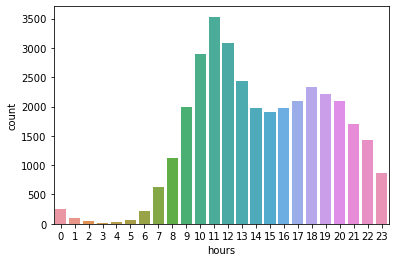

In [45]:
sns.countplot('hours',data=data)

### From the above Graph we can conclude that the Peak hour for transaction was  11:00 -- 12:00

In [46]:
J =data[['Transaction amount','hours']]
J

,Transaction amount,hours
0,300.0,10
1,2200.0,16
2,5450.0,5
3,5450.0,13
4,2725.0,17
...,...,...
35035,1700.0,17
35036,4050.0,20
35037,2000.0,10
35038,20000.0,10


In [47]:
J.groupby('hours').size()

hours
0      252
1       98
2       42
3       17
4       32
5       60
6      221
7      635
8     1124
9     2000
10    2903
11    3533
12    3083
13    2435
14    1968
15    1903
16    1968
17    2100
18    2341
19    2221
20    2103
21    1707
22    1430
23     864
dtype: int64

### Hourly trend for transactions for all days together as follows

In [48]:
 J.groupby('hours')['Transaction amount'].sum()

hours
0      1474217.67
1       756718.16
2       407854.16
3        98181.53
4       250506.22
5       376378.60
6      1863439.32
7      6463054.16
8      8401949.35
9     14669722.08
10    20116177.99
11    21603187.82
12    20962391.17
13    19231430.20
14    16671128.91
15    18797800.06
16    16406019.95
17    14255786.75
18    14207410.57
19    14447647.40
20    16131210.91
21    14852447.02
22    12157573.80
23     7340737.97
Name: Transaction amount, dtype: float64

## 4. Peak Hour of transaction : 11:00 -- 12:00 

# Question 5 : Any other interesting insight you can derive from this data
   
## Ans :  We can check which payment type has what status of the Transaction 

In [49]:
data['Status'].value_counts()

SUCCESS      34710
success        293
requested       18
queued          15
failure          4
Name: Status, dtype: int64

C:\Users\hrock\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status', ylabel='count'>

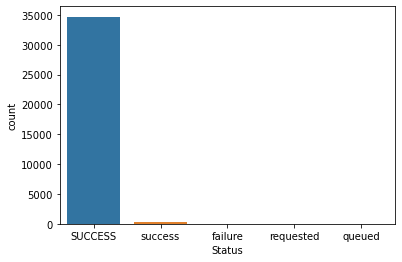

In [50]:
sns.countplot('Status',data=data,)

### Payment Status on payment type DC

In [51]:
K = data[data['Payment Type'].str.contains('DC')][['Status']]
K

,Status
120,SUCCESS
121,SUCCESS
122,SUCCESS
123,SUCCESS
124,SUCCESS
...,...
35035,SUCCESS
35036,SUCCESS
35037,SUCCESS
35038,SUCCESS


In [52]:
K['Status'].value_counts()

SUCCESS    12252
success       36
queued         8
Name: Status, dtype: int64

C:\Users\hrock\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status', ylabel='count'>

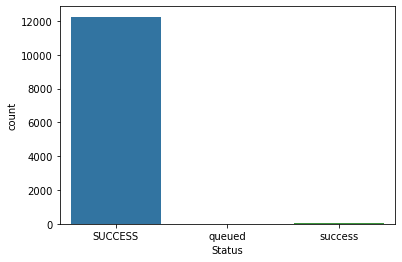

In [53]:
sns.countplot('Status',data = K)

### Payment Status on payment type UPI

In [54]:
L = data[data['Payment Type'].str.contains('UPI')][['Status']]
L

,Status
140,SUCCESS
141,SUCCESS
142,SUCCESS
143,SUCCESS
144,SUCCESS
...,...
35020,SUCCESS
35021,SUCCESS
35022,SUCCESS
35023,SUCCESS


In [55]:
L['Status'].value_counts()

SUCCESS      9212
success       109
failure         4
queued          2
requested       1
Name: Status, dtype: int64

C:\Users\hrock\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status', ylabel='count'>

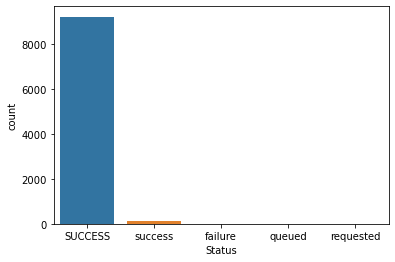

In [56]:
sns.countplot('Status',data = L)

### Payment Status on payment type NB

In [57]:
M = data[data['Payment Type'].str.contains('NB')][['Status']]
M

,Status
0,SUCCESS
1,SUCCESS
2,SUCCESS
3,SUCCESS
4,SUCCESS
...,...
34532,SUCCESS
34533,SUCCESS
34745,SUCCESS
34746,SUCCESS


In [58]:
M['Status'].value_counts()

SUCCESS      8074
success        80
requested      17
queued          3
Name: Status, dtype: int64

C:\Users\hrock\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status', ylabel='count'>

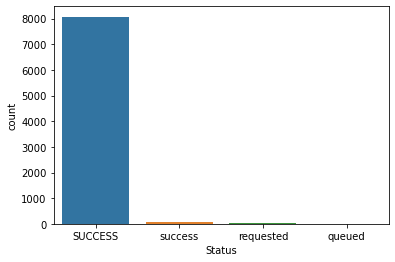

In [59]:
sns.countplot('Status',data = M)

### Payment Status on payment type CC

In [60]:
N = data[data['Payment Type'].str.contains('NB')][['Status']]
N

,Status
0,SUCCESS
1,SUCCESS
2,SUCCESS
3,SUCCESS
4,SUCCESS
...,...
34532,SUCCESS
34533,SUCCESS
34745,SUCCESS
34746,SUCCESS


In [61]:
N['Status'].value_counts()

SUCCESS      8074
success        80
requested      17
queued          3
Name: Status, dtype: int64

C:\Users\hrock\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status', ylabel='count'>

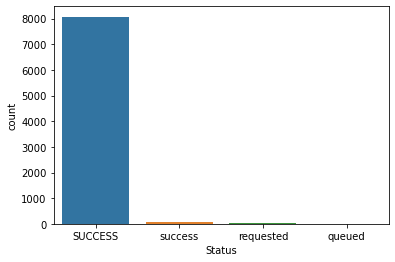

In [62]:
sns.countplot('Status',data = N)


### Payment Status on payment type Wallet

In [63]:
O = data[data['Payment Type'].str.contains('NB')][['Status']]
O

,Status
0,SUCCESS
1,SUCCESS
2,SUCCESS
3,SUCCESS
4,SUCCESS
...,...
34532,SUCCESS
34533,SUCCESS
34745,SUCCESS
34746,SUCCESS


In [64]:
O['Status'].value_counts()

SUCCESS      8074
success        80
requested      17
queued          3
Name: Status, dtype: int64

C:\Users\hrock\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status', ylabel='count'>

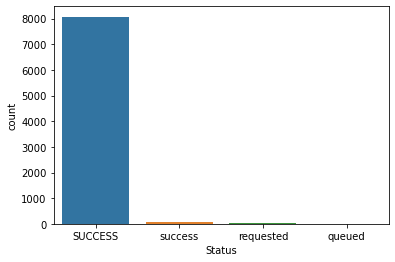

In [65]:
sns.countplot('Status',data = O)

### Payment Status on payment type EMI

In [66]:
P = data[data['Payment Type'].str.contains('NB')][['Status']]
P

,Status
0,SUCCESS
1,SUCCESS
2,SUCCESS
3,SUCCESS
4,SUCCESS
...,...
34532,SUCCESS
34533,SUCCESS
34745,SUCCESS
34746,SUCCESS


In [67]:
P['Status'].value_counts()

SUCCESS      8074
success        80
requested      17
queued          3
Name: Status, dtype: int64

C:\Users\hrock\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status', ylabel='count'>

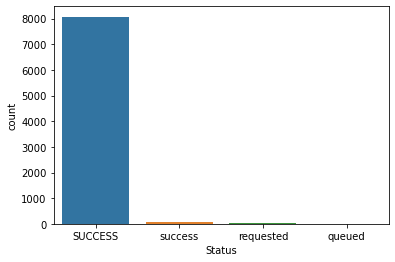

In [68]:
sns.countplot('Status',data = P)

# 5.  Therefore from the above data we can conclude that only the Payment type UPI has Failure in transaction  i.e Failure = 4 .


# Question 6. Average time taken between transaction & settlement (assume every day settlement happens at 12 noon)

In [69]:
data

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,Requested Action,Status,Transaction amount,Transaction fee,Payment Type,hours
0,9511450,9410106299,2021-07-14 10:03:00,16/07/21,capture,SUCCESS,300.0,21.24,NB,10
1,9639200,9406287755,2021-07-13 16:46:00,14/07/21,capture,SUCCESS,2200.0,22.42,NB,16
2,9682368,8070594039,2021-07-11 05:40:00,13/07/21,capture,SUCCESS,5450.0,22.42,NB,5
3,9682368,8070598614,2021-07-11 13:36:00,13/07/21,capture,SUCCESS,5450.0,22.42,NB,13
4,9682368,8070601263,2021-07-11 17:54:00,13/07/21,capture,SUCCESS,2725.0,22.42,NB,17
...,...,...,...,...,...,...,...,...,...,...
35035,14794168,8070658263,2021-07-11 17:10:00,13/07/21,capture,SUCCESS,1700.0,0.00,DC,17
35036,14811686,8070661171,2021-07-11 20:36:00,\N,capture,SUCCESS,4050.0,0.00,DC,20
35037,14823548,8070652765,2021-07-11 10:38:00,13/07/21,capture,SUCCESS,2000.0,0.00,DC,10
35038,14823548,8070652926,2021-07-11 10:46:00,13/07/21,capture,SUCCESS,20000.0,0.00,DC,10


### Removing '/n' Values from Settlement Date

In [70]:
Q = data[data['Settlement Date'].str.contains('/07/21')]
Q

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,Requested Action,Status,Transaction amount,Transaction fee,Payment Type,hours
0,9511450,9410106299,2021-07-14 10:03:00,16/07/21,capture,SUCCESS,300.0,21.24,NB,10
1,9639200,9406287755,2021-07-13 16:46:00,14/07/21,capture,SUCCESS,2200.0,22.42,NB,16
2,9682368,8070594039,2021-07-11 05:40:00,13/07/21,capture,SUCCESS,5450.0,22.42,NB,5
3,9682368,8070598614,2021-07-11 13:36:00,13/07/21,capture,SUCCESS,5450.0,22.42,NB,13
4,9682368,8070601263,2021-07-11 17:54:00,13/07/21,capture,SUCCESS,2725.0,22.42,NB,17
...,...,...,...,...,...,...,...,...,...,...
35034,14794168,8070655095,2021-07-11 12:54:00,13/07/21,capture,SUCCESS,3600.0,0.00,DC,12
35035,14794168,8070658263,2021-07-11 17:10:00,13/07/21,capture,SUCCESS,1700.0,0.00,DC,17
35037,14823548,8070652765,2021-07-11 10:38:00,13/07/21,capture,SUCCESS,2000.0,0.00,DC,10
35038,14823548,8070652926,2021-07-11 10:46:00,13/07/21,capture,SUCCESS,20000.0,0.00,DC,10


###  Inserting the  Time Column in the Dataset i.e Time = '12:00' ( According to question )

In [71]:
Q.insert(4, 'time', ' 12:00')

In [72]:
Q

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,time,Requested Action,Status,Transaction amount,Transaction fee,Payment Type,hours
0,9511450,9410106299,2021-07-14 10:03:00,16/07/21,12:00,capture,SUCCESS,300.0,21.24,NB,10
1,9639200,9406287755,2021-07-13 16:46:00,14/07/21,12:00,capture,SUCCESS,2200.0,22.42,NB,16
2,9682368,8070594039,2021-07-11 05:40:00,13/07/21,12:00,capture,SUCCESS,5450.0,22.42,NB,5
3,9682368,8070598614,2021-07-11 13:36:00,13/07/21,12:00,capture,SUCCESS,5450.0,22.42,NB,13
4,9682368,8070601263,2021-07-11 17:54:00,13/07/21,12:00,capture,SUCCESS,2725.0,22.42,NB,17
...,...,...,...,...,...,...,...,...,...,...,...
35034,14794168,8070655095,2021-07-11 12:54:00,13/07/21,12:00,capture,SUCCESS,3600.0,0.00,DC,12
35035,14794168,8070658263,2021-07-11 17:10:00,13/07/21,12:00,capture,SUCCESS,1700.0,0.00,DC,17
35037,14823548,8070652765,2021-07-11 10:38:00,13/07/21,12:00,capture,SUCCESS,2000.0,0.00,DC,10
35038,14823548,8070652926,2021-07-11 10:46:00,13/07/21,12:00,capture,SUCCESS,20000.0,0.00,DC,10


### Adding the 'Time' column and 'Settlement Date' column 

In [73]:
Q['Settlement Date'] = Q['Settlement Date'] + Q['time']
Q['Settlement Date']

<ipython-input-73-914778873310>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q['Settlement Date'] = Q['Settlement Date'] + Q['time']


0        16/07/21 12:00
1        14/07/21 12:00
2        13/07/21 12:00
3        13/07/21 12:00
4        13/07/21 12:00
              ...      
35034    13/07/21 12:00
35035    13/07/21 12:00
35037    13/07/21 12:00
35038    13/07/21 12:00
35039    13/07/21 12:00
Name: Settlement Date, Length: 29981, dtype: object

In [74]:
Q

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,time,Requested Action,Status,Transaction amount,Transaction fee,Payment Type,hours
0,9511450,9410106299,2021-07-14 10:03:00,16/07/21 12:00,12:00,capture,SUCCESS,300.0,21.24,NB,10
1,9639200,9406287755,2021-07-13 16:46:00,14/07/21 12:00,12:00,capture,SUCCESS,2200.0,22.42,NB,16
2,9682368,8070594039,2021-07-11 05:40:00,13/07/21 12:00,12:00,capture,SUCCESS,5450.0,22.42,NB,5
3,9682368,8070598614,2021-07-11 13:36:00,13/07/21 12:00,12:00,capture,SUCCESS,5450.0,22.42,NB,13
4,9682368,8070601263,2021-07-11 17:54:00,13/07/21 12:00,12:00,capture,SUCCESS,2725.0,22.42,NB,17
...,...,...,...,...,...,...,...,...,...,...,...
35034,14794168,8070655095,2021-07-11 12:54:00,13/07/21 12:00,12:00,capture,SUCCESS,3600.0,0.00,DC,12
35035,14794168,8070658263,2021-07-11 17:10:00,13/07/21 12:00,12:00,capture,SUCCESS,1700.0,0.00,DC,17
35037,14823548,8070652765,2021-07-11 10:38:00,13/07/21 12:00,12:00,capture,SUCCESS,2000.0,0.00,DC,10
35038,14823548,8070652926,2021-07-11 10:46:00,13/07/21 12:00,12:00,capture,SUCCESS,20000.0,0.00,DC,10


### Changing the 'Setlement Date' column in date_time format

In [75]:
Q['Settlement Date'] = pd.to_datetime(Q['Settlement Date'])
Q

<ipython-input-75-63c093acd146>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q['Settlement Date'] = pd.to_datetime(Q['Settlement Date'])


,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,time,Requested Action,Status,Transaction amount,Transaction fee,Payment Type,hours
0,9511450,9410106299,2021-07-14 10:03:00,2021-07-16 12:00:00,12:00,capture,SUCCESS,300.0,21.24,NB,10
1,9639200,9406287755,2021-07-13 16:46:00,2021-07-14 12:00:00,12:00,capture,SUCCESS,2200.0,22.42,NB,16
2,9682368,8070594039,2021-07-11 05:40:00,2021-07-13 12:00:00,12:00,capture,SUCCESS,5450.0,22.42,NB,5
3,9682368,8070598614,2021-07-11 13:36:00,2021-07-13 12:00:00,12:00,capture,SUCCESS,5450.0,22.42,NB,13
4,9682368,8070601263,2021-07-11 17:54:00,2021-07-13 12:00:00,12:00,capture,SUCCESS,2725.0,22.42,NB,17
...,...,...,...,...,...,...,...,...,...,...,...
35034,14794168,8070655095,2021-07-11 12:54:00,2021-07-13 12:00:00,12:00,capture,SUCCESS,3600.0,0.00,DC,12
35035,14794168,8070658263,2021-07-11 17:10:00,2021-07-13 12:00:00,12:00,capture,SUCCESS,1700.0,0.00,DC,17
35037,14823548,8070652765,2021-07-11 10:38:00,2021-07-13 12:00:00,12:00,capture,SUCCESS,2000.0,0.00,DC,10
35038,14823548,8070652926,2021-07-11 10:46:00,2021-07-13 12:00:00,12:00,capture,SUCCESS,20000.0,0.00,DC,10


### Adding a column named 'diff' in the data set which contain the time Difference  between 'Settlement Date' and 'Date of Transaction'

In [76]:
diff  = (Q['Settlement Date'] - Q['Date of Transaction'])
Q['diff'] = diff


<ipython-input-76-8af3fc232acc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q['diff'] = diff


In [77]:
Q

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,time,Requested Action,Status,Transaction amount,Transaction fee,Payment Type,hours,diff
0,9511450,9410106299,2021-07-14 10:03:00,2021-07-16 12:00:00,12:00,capture,SUCCESS,300.0,21.24,NB,10,2 days 01:57:00
1,9639200,9406287755,2021-07-13 16:46:00,2021-07-14 12:00:00,12:00,capture,SUCCESS,2200.0,22.42,NB,16,0 days 19:14:00
2,9682368,8070594039,2021-07-11 05:40:00,2021-07-13 12:00:00,12:00,capture,SUCCESS,5450.0,22.42,NB,5,2 days 06:20:00
3,9682368,8070598614,2021-07-11 13:36:00,2021-07-13 12:00:00,12:00,capture,SUCCESS,5450.0,22.42,NB,13,1 days 22:24:00
4,9682368,8070601263,2021-07-11 17:54:00,2021-07-13 12:00:00,12:00,capture,SUCCESS,2725.0,22.42,NB,17,1 days 18:06:00
...,...,...,...,...,...,...,...,...,...,...,...,...
35034,14794168,8070655095,2021-07-11 12:54:00,2021-07-13 12:00:00,12:00,capture,SUCCESS,3600.0,0.00,DC,12,1 days 23:06:00
35035,14794168,8070658263,2021-07-11 17:10:00,2021-07-13 12:00:00,12:00,capture,SUCCESS,1700.0,0.00,DC,17,1 days 18:50:00
35037,14823548,8070652765,2021-07-11 10:38:00,2021-07-13 12:00:00,12:00,capture,SUCCESS,2000.0,0.00,DC,10,2 days 01:22:00
35038,14823548,8070652926,2021-07-11 10:46:00,2021-07-13 12:00:00,12:00,capture,SUCCESS,20000.0,0.00,DC,10,2 days 01:14:00


In [78]:
Q['diff']

0       2 days 01:57:00
1       0 days 19:14:00
2       2 days 06:20:00
3       1 days 22:24:00
4       1 days 18:06:00
              ...      
35034   1 days 23:06:00
35035   1 days 18:50:00
35037   2 days 01:22:00
35038   2 days 01:14:00
35039   1 days 15:52:00
Name: diff, Length: 29981, dtype: timedelta64[ns]

### Creating another column named 'diff_in_hrs' which contains the value of diff column but only in hours 

In [79]:
Q['diff_in_hrs'] = Q['diff'] / pd.Timedelta('1 hour')

<ipython-input-79-076989e411cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q['diff_in_hrs'] = Q['diff'] / pd.Timedelta('1 hour')


In [80]:
Q

,Merchant ID,Transaction ID,Date of Transaction,Settlement Date,time,Requested Action,Status,Transaction amount,Transaction fee,Payment Type,hours,diff,diff_in_hrs
0,9511450,9410106299,2021-07-14 10:03:00,2021-07-16 12:00:00,12:00,capture,SUCCESS,300.0,21.24,NB,10,2 days 01:57:00,49.950000
1,9639200,9406287755,2021-07-13 16:46:00,2021-07-14 12:00:00,12:00,capture,SUCCESS,2200.0,22.42,NB,16,0 days 19:14:00,19.233333
2,9682368,8070594039,2021-07-11 05:40:00,2021-07-13 12:00:00,12:00,capture,SUCCESS,5450.0,22.42,NB,5,2 days 06:20:00,54.333333
3,9682368,8070598614,2021-07-11 13:36:00,2021-07-13 12:00:00,12:00,capture,SUCCESS,5450.0,22.42,NB,13,1 days 22:24:00,46.400000
4,9682368,8070601263,2021-07-11 17:54:00,2021-07-13 12:00:00,12:00,capture,SUCCESS,2725.0,22.42,NB,17,1 days 18:06:00,42.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35034,14794168,8070655095,2021-07-11 12:54:00,2021-07-13 12:00:00,12:00,capture,SUCCESS,3600.0,0.00,DC,12,1 days 23:06:00,47.100000
35035,14794168,8070658263,2021-07-11 17:10:00,2021-07-13 12:00:00,12:00,capture,SUCCESS,1700.0,0.00,DC,17,1 days 18:50:00,42.833333
35037,14823548,8070652765,2021-07-11 10:38:00,2021-07-13 12:00:00,12:00,capture,SUCCESS,2000.0,0.00,DC,10,2 days 01:22:00,49.366667
35038,14823548,8070652926,2021-07-11 10:46:00,2021-07-13 12:00:00,12:00,capture,SUCCESS,20000.0,0.00,DC,10,2 days 01:14:00,49.233333


### Calculating the Average 

In [81]:
avg = pd.to_numeric(Q['diff_in_hrs'], errors='coerce').mean()
avg

32.28959563278962

# 6. Therefore from above we can conclude that the  Average time taken between transaction & settlement (assume every day settlement happens at 12 noon) = 32.28959563278962 Hrs 